In [1]:
import plotly; import pandas as pd; import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import spearmanr
from collections import Counter
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Make figures look good for hi-res displays.

# Comparing Retweet Streams

In [84]:
#Dataset: 
df = pd.read_json('/data/diffusion/cdc_userstreams_top_25_retweeted_2020-06-09.json')

#View the raw data
df.head(2)

,id,created_at,username,followers_count,source,followers_count_cumsum,text,top_N
0,1253786298390732800,2020-04-24 20:42:02+00:00,mylow196,13,"<a href=""http://twitter.com/download/iphone"" r...",9922339,Household cleaners and disinfectants can cause...,1
1,1254038937825402880,2020-04-25 13:25:56+00:00,stewonthis1,11238,"<a href=""http://twitter.com/download/iphone"" r...",15751053,Household cleaners and disinfectants can cause...,1


In [106]:
users = {}

for t, retweets in df.groupby('top_N'):
    retweets = retweets.sort_values(by='created_at').reindex()
    index_of_trump_retweet = retweets[retweets.username == 'realDonaldTrump'].index
        
    if t == 1:
        for idx, tweet in retweets.iterrows():
            users[tweet.username] = {'tweet_1':tweet.created_at}
       
    elif index_of_trump_retweet.any() > 0: #The tweet he deleted
        for idx, tweet in retweets.iterrows():
            if tweet.username in users:
                users[tweet.username]['tweet_'+str(t)] = tweet.created_at
            else:                
                users[tweet.username] = {'tweet_'+str(t):tweet.created_at}


,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_10,tweet_11,tweet_12,tweet_13,tweet_14,tweet_15
username,,,,,,,,,,,,,,
0000DD02,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-04-26 01:45:36+00:00,2020-04-25 22:03:11+00:00
01judith01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-04-25 18:05:50+00:00
03forester,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-04-25 15:13:42+00:00,2020-05-25 02:48:14+00:00,2020-04-25 15:16:09+00:00,2020-04-25 15:16:32+00:00,2020-04-25 15:15:00+00:00
0522james,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-04-25 15:30:30+00:00,2020-04-25 15:40:51+00:00,2020-04-25 15:28:17+00:00
0c5l6ZP4i5gN45w,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-04-25 14:14:18+00:00


In [ ]:
df[df.username=='03forester']

In [112]:
df2.index.nunique()

2309

In [110]:
df2.to_csv('retweeting_times.csv')

In [77]:
len(df2.index)

471368

# For `X` hour windows:

In [12]:
window=24

retweets_after_trump, source_counts, user_counts = get_retweets_after_trump(df, window=window, debug=True)

#Which should we compare?
A = 4
B = 12

df2, sr, p = rank_twitterers(retweets_after_trump[A], retweets_after_trump[B])
print("The % similar is: {:.2f} with {} users in both streams".format(p, len(df2)))
print(sr)


f = make_plot(df2, user_counts)
f.show()

with open('/data/www/tmp.html','w') as outFile:
    outFile.write( plotly.io.to_html(f,include_plotlyjs='cdn') )

Tweet TopN #: 1; we think @realDonaldTrump retweeted at 2020-04-25 13:01:55+00:00
2808 retweets in 24 hour(s) after Trump

Tweet TopN #: 2; @realDonaldTrump retweeted at 2020-04-25 13:04:07+00:00
2522 retweets in 24 hour(s) after Trump

Tweet TopN #: 3; @realDonaldTrump retweeted at 2020-04-25 13:08:14+00:00
3056 retweets in 24 hour(s) after Trump

Tweet TopN #: 4; @realDonaldTrump retweeted at 2020-05-25 02:29:05+00:00
3034 retweets in 24 hour(s) after Trump

Tweet TopN #: 5; @realDonaldTrump retweeted at 2020-05-01 23:28:32+00:00
2666 retweets in 24 hour(s) after Trump

Tweet TopN #: 6; @realDonaldTrump retweeted at 2020-04-25 13:05:26+00:00
2588 retweets in 24 hour(s) after Trump

Tweet TopN #: 7; @realDonaldTrump retweeted at 2020-04-25 12:12:10+00:00
2572 retweets in 24 hour(s) after Trump

Tweet TopN #: 8; @realDonaldTrump retweeted at 2020-04-25 13:05:51+00:00
2460 retweets in 24 hour(s) after Trump

Tweet TopN #: 10; @realDonaldTrump retweeted at 2020-04-25 12:12:52+00:00
2360 

# Do all of them...

In [86]:
window=24

retweets_after_trump, source_counts, user_counts = get_retweets_after_trump(df, window=window)


for A in retweets_after_trump.keys():
    for B in retweets_after_trump.keys():
        if B > A:
            df2, sr, p = rank_twitterers(retweets_after_trump[A], retweets_after_trump[B])
            
            f = make_plot(df2, user_counts)
            with open('/data/www/covid19-static-pages/docs/retweet_correlations/{}_{}_{}H.html'.format(A,B,window),'w') as outFile:
                outFile.write( plotly.io.to_html(f,include_plotlyjs='cdn') )

            print("{},{},{},{},{},https://epic.cs.colorado.edu/covid19/retweet_correlations/{}_{}_{}H.html".format(A,B,p,sr.correlation,sr.pvalue,A,B,window))


1,2,62.17287866772403,0.9719712888455362,0.0,https://epic.cs.colorado.edu/covid19/retweet_correlations/1_2_24H.html
1,3,53.31196581196581,0.911684838857383,0.0,https://epic.cs.colorado.edu/covid19/retweet_correlations/1_3_24H.html
1,4,35.00712250712251,0.19461052341994148,7.615299851498518e-10,https://epic.cs.colorado.edu/covid19/retweet_correlations/1_4_24H.html
1,5,39.15978994748687,0.23101491081966985,4.098212983847099e-14,https://epic.cs.colorado.edu/covid19/retweet_correlations/1_5_24H.html
1,6,59.27357032457496,0.95924803259054,0.0,https://epic.cs.colorado.edu/covid19/retweet_correlations/1_6_24H.html
1,7,55.83203732503888,0.8066950044989141,0.0,https://epic.cs.colorado.edu/covid19/retweet_correlations/1_7_24H.html
1,8,60.16260162601627,0.9543718210003104,0.0,https://epic.cs.colorado.edu/covid19/retweet_correlations/1_8_24H.html
1,10,57.245762711864415,0.8064800687799032,3.635370914849e-310,https://epic.cs.colorado.edu/covid19/retweet_correlations/1_10_24H.html
1,11,58.7927565392

7,11,55.53319919517102,0.7564282125519796,2.452302059764532e-256,https://epic.cs.colorado.edu/covid19/retweet_correlations/7_11_24H.html
7,12,39.23524522028263,0.22466406998949645,2.889000889129826e-12,https://epic.cs.colorado.edu/covid19/retweet_correlations/7_12_24H.html
7,13,68.1203007518797,0.808703591283305,4.891799473e-315,https://epic.cs.colorado.edu/covid19/retweet_correlations/7_13_24H.html
7,14,69.0049751243781,0.8132535930130816,0.0,https://epic.cs.colorado.edu/covid19/retweet_correlations/7_14_24H.html
7,15,66.10754810064134,0.7837731089323781,4.416009415873886e-279,https://epic.cs.colorado.edu/covid19/retweet_correlations/7_15_24H.html
8,10,57.11864406779661,0.7637493358020778,3.8567350756212066e-258,https://epic.cs.colorado.edu/covid19/retweet_correlations/8_10_24H.html
8,11,73.86178861788618,0.9662010080900741,0.0,https://epic.cs.colorado.edu/covid19/retweet_correlations/8_11_24H.html
8,12,41.64588528678304,0.2098500615689757,1.9566156185460786e-11,https://epic.cs.colora

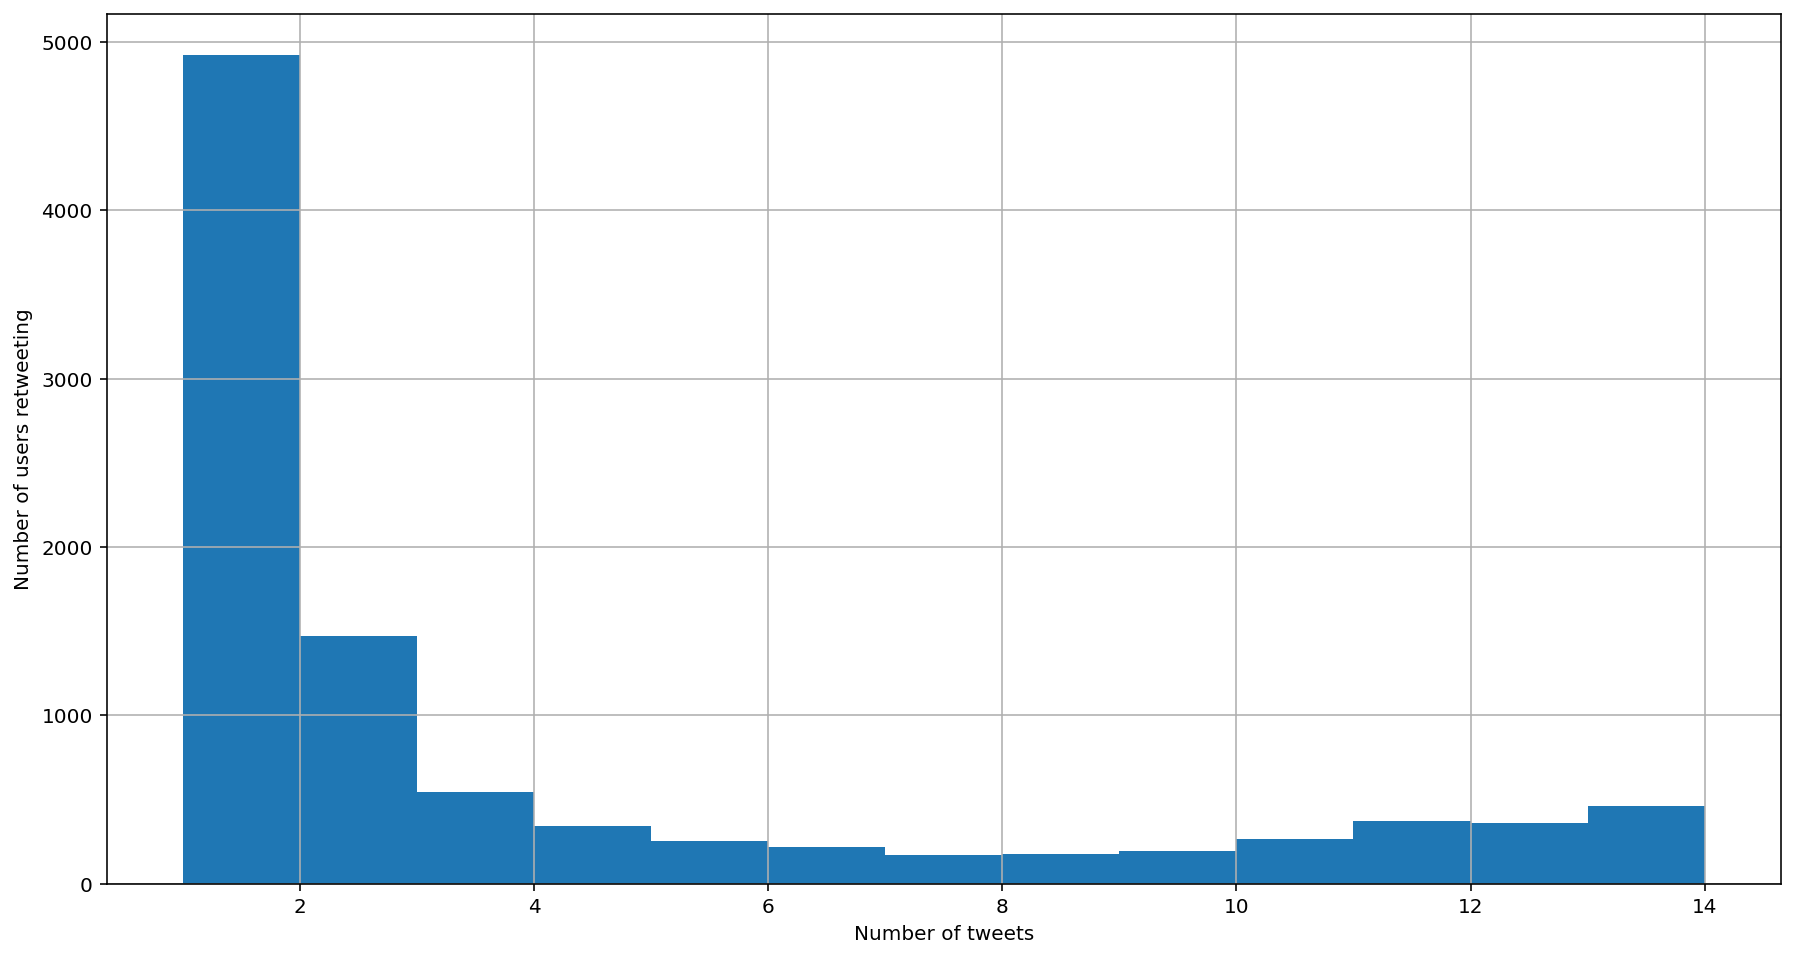

In [87]:
ax = pd.Series([x[1] for x in user_counts.most_common()]).hist(figsize=(15,8), bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_ylabel("Number of users retweeting")
ax.set_xlabel("Number of tweets");

In [20]:
users_that_retweet_all = [x[0] for x in user_counts.most_common() if x[1] >= 13 and x[1] < 20]
len(users_that_retweet_all)

460

In [33]:
lines = []
for u in users_that_retweet_all:
    for k in retweets_after_trump.keys():
        v = retweets_after_trump[k][retweets_after_trump[k].username==u].timeSinceTrump.apply(lambda x: x.total_seconds())
        if len(v):
            lines.append({'u':u,'t':v.values[0]})
        
df3 = pd.DataFrame(lines)
df3.head()

,u,t
0,PatriotNana64,117.0
1,PatriotNana64,115.0
2,PatriotNana64,4610.0
3,PatriotNana64,24855.0
4,PatriotNana64,110.0


In [36]:
gb_u = df3.groupby('u').aggregate({'t':['mean','std']})

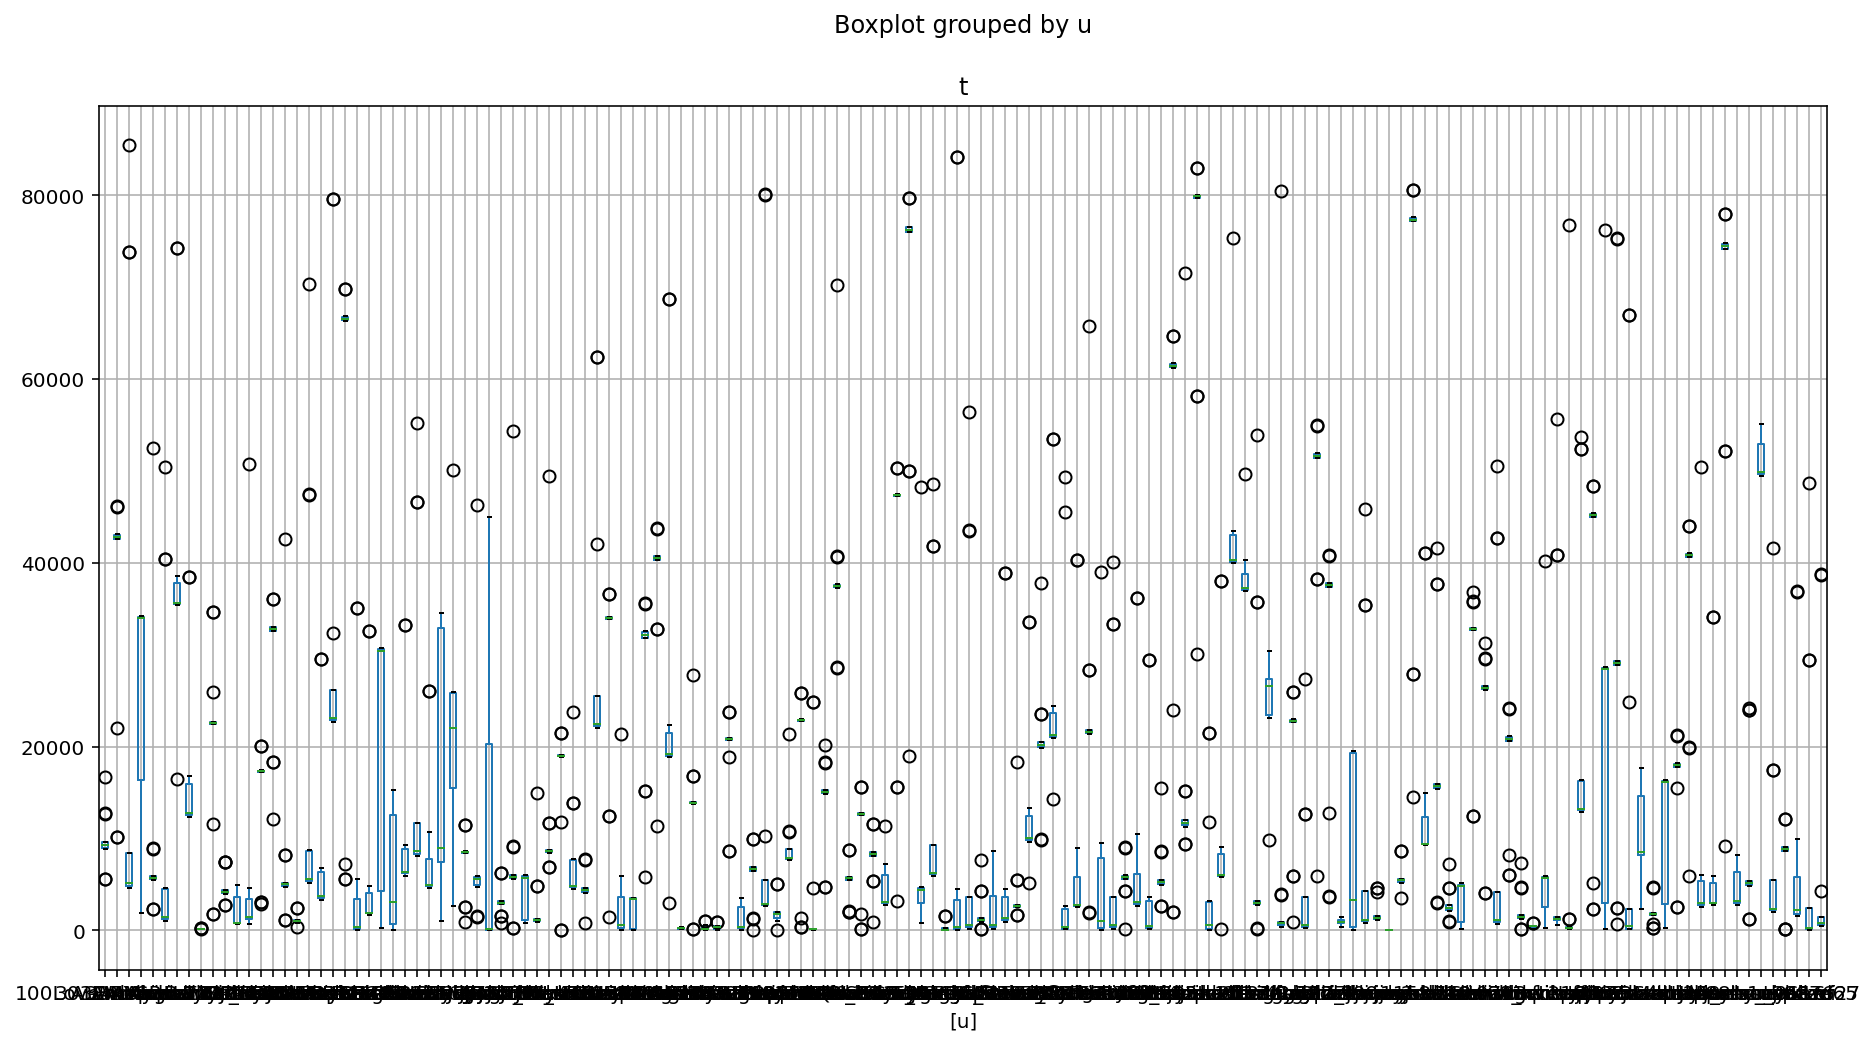

In [47]:
ax = df3.head(2000).boxplot(by='u', figsize=(15,8))

In [45]:
# This didn't seem to work as expected?